In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('podatki_PM.csv')

In [16]:
data.head()

,Datum,Glob_sevanje_mean,Hitrost_vetra_mean,Sunki_vetra_max,Padavine_sum,Vlaga_mean,Temperatura_Krvavec_mean,Temperatura_lokacija_mean,PM10,PM_vceraj,sinD,cosD
0,2013-01-02,0.125,0.6750,2.9,0.0,79.1750,-2.9875,3.2000,44.3,51.4,0.034899,0.999391
1,2013-01-03,0.375,0.7375,2.6,0.0,93.5625,-4.5250,2.8750,49.0,44.3,0.052336,0.998630
2,2013-01-04,0.875,0.8875,3.2,0.0,93.3000,2.9625,0.6875,61.3,49.0,0.069756,0.997564
3,2013-01-05,0.750,1.0000,4.5,0.0,94.2625,2.9875,0.5875,38.9,61.3,0.087156,0.996195
4,2013-01-06,0.250,0.5750,2.3,0.0,87.6500,-0.2500,3.1625,30.3,38.9,0.104528,0.994522


In [17]:
data.shape[0] #Prvotno št. vrstic

1213

In [18]:
data = data.dropna() #Se znebimo manjkajoćih (33 vrednosti)
data = data.drop(columns=['Datum'])
data.head()

,Glob_sevanje_mean,Hitrost_vetra_mean,Sunki_vetra_max,Padavine_sum,Vlaga_mean,Temperatura_Krvavec_mean,Temperatura_lokacija_mean,PM10,PM_vceraj,sinD,cosD
0,0.125,0.6750,2.9,0.0,79.1750,-2.9875,3.2000,44.3,51.4,0.034899,0.999391
1,0.375,0.7375,2.6,0.0,93.5625,-4.5250,2.8750,49.0,44.3,0.052336,0.998630
2,0.875,0.8875,3.2,0.0,93.3000,2.9625,0.6875,61.3,49.0,0.069756,0.997564
3,0.750,1.0000,4.5,0.0,94.2625,2.9875,0.5875,38.9,61.3,0.087156,0.996195
4,0.250,0.5750,2.3,0.0,87.6500,-0.2500,3.1625,30.3,38.9,0.104528,0.994522


In [19]:
data.shape[0]

1180

In [20]:
split_ratio = 0.8 #Nastavimo razdelitev na testno in učno množico
split_index = int(len(data) * split_ratio)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]


X_train = train_data.drop(columns=['PM10']).values
y_train = train_data['PM10'].values

X_test = test_data.drop(columns=['PM10']).values
y_test = test_data['PM10'].values


In [21]:
test_data.shape[0]

236

In [22]:
import numpy as np
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred = X_test @ theta

mse_manual = np.mean((y_pred - y_test) ** 2)
print(f'Manual Linear Regression MSE: {mse_manual}')


Manual Linear Regression MSE: 70.0904926179602


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train[:, 1:], y_train)

y_pred_sklearn = model.predict(X_test[:, 1:])


mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'SciKit-learn Linear Regression MSE: {mse_sklearn}')


SciKit-learn Linear Regression MSE: 68.73368652278317


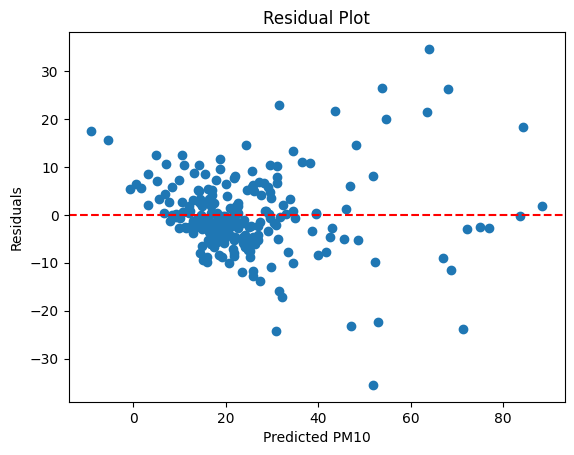

In [24]:
import matplotlib.pyplot as plt



residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted PM10')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
#log transformacija
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
theta_log = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train_log
y_pred_log = X_test @ theta_log
mse_log = np.mean((np.expm1(y_pred_log) - y_test) ** 2)
print(f'Log-transformed Linear Regression MSE is significantly worse: {mse_log}')

#skaliranje značilk
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
theta_scaled = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train
y_pred_scaled = X_test_scaled @ theta_scaled
mse_scaled = np.mean((y_pred_scaled - y_test) ** 2)
print(f'Scaled Linear Regression MSE even worse: {mse_scaled}')




Log-transformed Linear Regression MSE is significantly worse: 144.08429808319573
Scaled Linear Regression MSE even worse: 624.1237832572824
